In [6]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Loading the dataset
df = pd.read_csv("/kaggle/input/unemployment-in-india/Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**Checking for:**

1. Missing values
2. Column types
3. Overall stats

In [8]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
df.columns



Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Data Cleaning

In [10]:
# Converting date to datetime
df[' Date'] = pd.to_datetime(df[' Date'])


/tmp/ipykernel_47/2476734742.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


In [12]:
# Filling missing unemployment rates 
df[ ' Estimated Unemployment Rate (%)'
] = df[ ' Estimated Unemployment Rate (%)'
].fillna(df[ ' Estimated Unemployment Rate (%)'
].median())


# Extracting time features:

Helps to find seasonal patterns

In [14]:
df['Year'] = df[' Date'].dt.year
df['Month'] = df[' Date'].dt.month_name()


# Unemployment trend over time

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


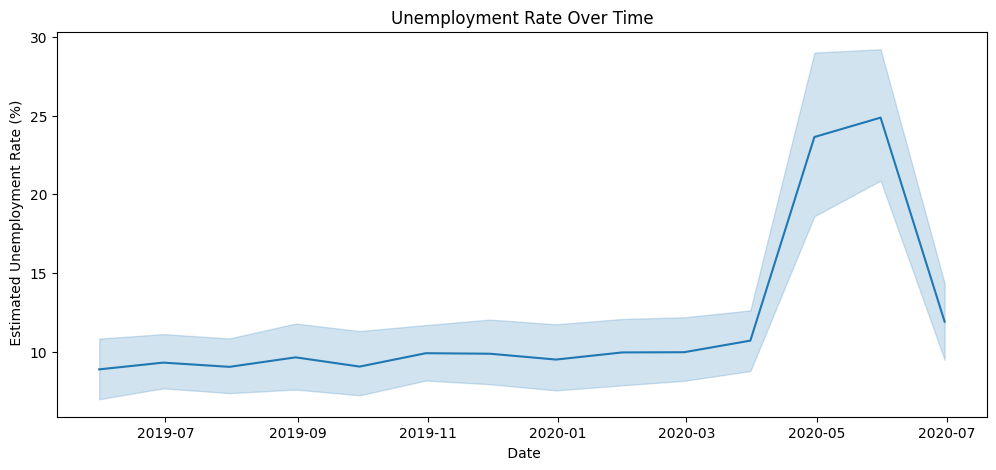

In [15]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate Over Time")
plt.show()


# COVID 19 Impact Analysis:

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


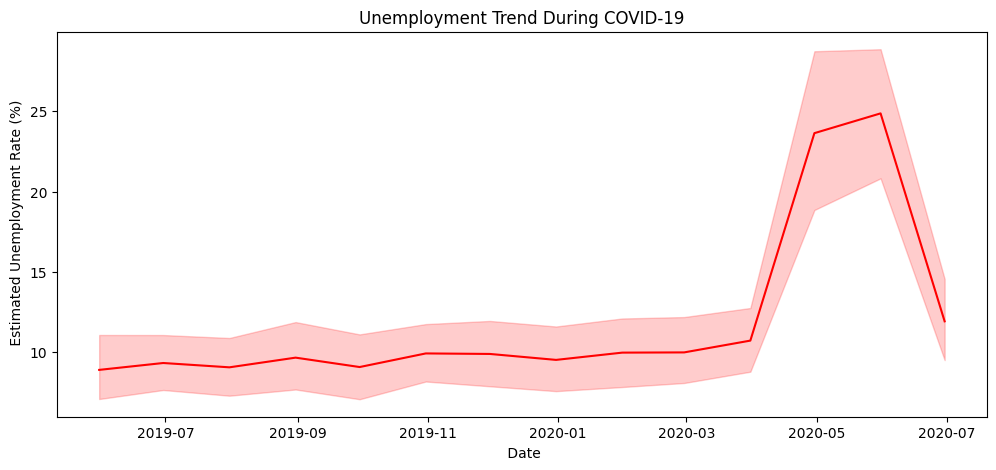

In [16]:
covid = df[(df['Year'] >= 2019) & (df['Year'] <= 2021)]

plt.figure(figsize=(12,5))
sns.lineplot(data=covid, x=' Date', y=' Estimated Unemployment Rate (%)', color='red')
plt.title("Unemployment Trend During COVID-19")
plt.show()


**Observations:**

Sharp spike in 2020 (due to lockdowns).

Slow recovery in late 2021.

# Comparing Pre-Covid vs Covid vs Post-Covid

In [17]:
pre_covid = df[df['Year'] < 2020][' Estimated Unemployment Rate (%)'].mean()
during_covid = df[(df['Year'] >= 2020) & (df['Year'] <= 2021)][' Estimated Unemployment Rate (%)'].mean()
post_covid = df[df['Year'] > 2021][' Estimated Unemployment Rate (%)'].mean()

pre_covid, during_covid, post_covid


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


(9.399046511627906, 15.10158064516129, nan)

Unemployment spiked during covid

# Seasonal Trends

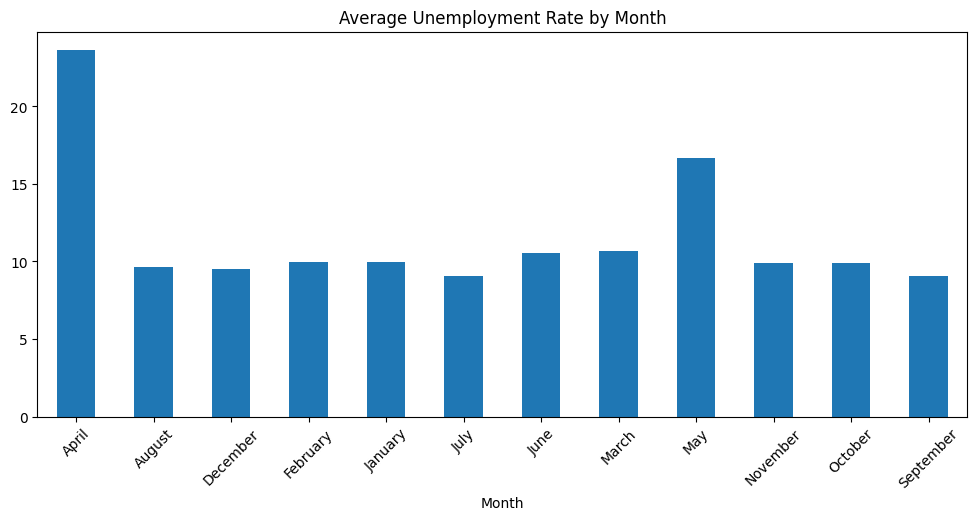

In [18]:
monthly = df.groupby('Month')[' Estimated Unemployment Rate (%)'].mean()
monthly.plot(kind='bar', figsize=(12,5))
plt.title("Average Unemployment Rate by Month")
plt.xticks(rotation=45)
plt.show()


**Observations:**
Unemployment is higher in summer ,i.e, April and May

# Statewise unemployment

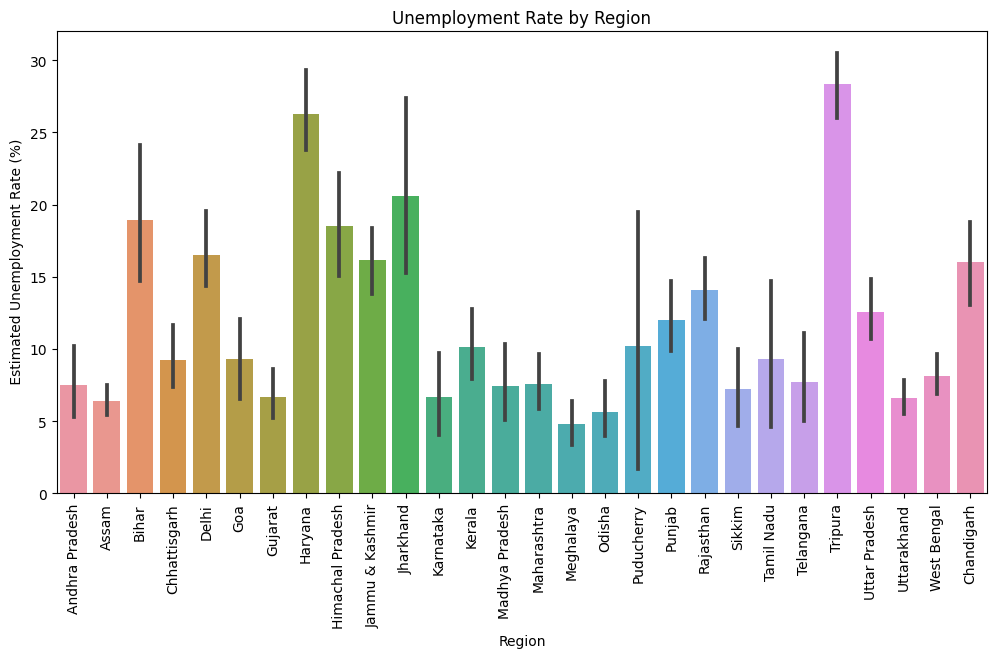

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Region', y=' Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region")
plt.show()


**Observations:**
Tripura has the highest unemployment rate followed by Haryana and Jharkhand

# INSIGHTS DRAWN:

1. Covid-19 caused a major spike in unemployment

     Lockdowns shut industries

     Migrant workers returned home

     Tourism, hospitality, retail collapsed

2. Slow recovery after 2021

     As industries reopened, unemployment started decreasing

     Service sector recovered faster than manufacturing

3. Seasonal Patterns Observed

     Certain months show consistent rise (e.g., monsoon slowdown in agriculture)

     Festive seasons may reduce unemployment due to temporary jobs

4. Regional Variations

    Urban areas had sharper unemployment spikes

    Rural areas were hit later but recovered slower




 

# Policy Recommendations:

1. Strengthening Social Safety Nets

   Direct income support during crises

   Unemployment insurance programs

2. Skill Training & Upskilling

   Government-funded digital skills training

   Reskilling workers from dying industries (e.g., travel → logistics)

3. Support for Small Businesses

   Low-interest loans

   Tax relief for MSMEs

   Simplified business registration

4. Remote Work & Digital Economy Boost

   Broadband access in rural areas

   Promote freelance platforms

   Upskill workers for remote jobs

5. Labor Market Reforms

   Better job matching systems

   Stronger worker protections

   Formalizing gig economy jobs


   









